Pré-processamento realizado em Processing.ipynb

# Bibliotecas

In [2]:
import os
import pandas as pd
import numpy as np
import scipy as sp
from scipy import signal
import ml_time_series as mls
import timeit
from datetime import datetime
from sklearn.externals import joblib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import utils

%matplotlib notebook

In [3]:
def Stacker(files_,t):
    
    #Lê dados do arquivo e remove janela
    Xc = np.load('preproc/'+files_[3])
    Xc = Xc[:-49]
    #print t
    #print len(Xc)
    
    #Aplica Hstack nos dados
    for j in range(0,len(files_)-1):
        Xci = np.load('preproc/'+files_[j])
        #print len(Xci)
        Xc = np.hstack((Xc.reshape(Xc.shape),Xci.reshape(Xci.shape)))
        
    #Labeling the PKS level    
    #C = (np.ones(len(Xc))*l).reshape((len(Xc),1))
    #Xc = np.hstack((Xc.reshape(Xc.shape),C.reshape((len(Xc),1))))    
    
    # Salving in file on the folder <preproc/labeled>  
    if "v" in t:
        np.save('preproc/stacked_v/'+t+'_hs', Xc, allow_pickle=False)
        DATAv_hs.append(t+'_hs.npy')
    else:
        np.save('preproc/stacked_t/'+t+'_hs', Xc, allow_pickle=False)
        DATA_hs.append(t+'_hs.npy')

In [4]:
#files = os.listdir('C:\Users\jorge.junior\Documents\GitHub\PKS\preproc')
files = os.listdir('preproc')

files

['labeled_bt',
 'labeled_bv',
 'labeled_t',
 'labeled_v',
 'pd06.1.1_fft.npy',
 'pd06.1.1_filt.npy',
 'pd06.1.1_rms.npy',
 'pd06.1.1_std.npy',
 'pd06.1.2_fft.npy',
 'pd06.1.2_filt.npy',
 'pd06.1.2_rms.npy',
 'pd06.1.2_std.npy',
 'pd06.1.3_fft.npy',
 'pd06.1.3_filt.npy',
 'pd06.1.3_rms.npy',
 'pd06.1.3_std.npy',
 'pd07.1.1_fft.npy',
 'pd07.1.1_filt.npy',
 'pd07.1.1_rms.npy',
 'pd07.1.1_std.npy',
 'pd07.1.2_fft.npy',
 'pd07.1.2_filt.npy',
 'pd07.1.2_rms.npy',
 'pd07.1.2_std.npy',
 'pd07.1.3_fft.npy',
 'pd07.1.3_filt.npy',
 'pd07.1.3_rms.npy',
 'pd07.1.3_std.npy',
 'pd09.2.1_fft.npy',
 'pd09.2.1_filt.npy',
 'pd09.2.1_rms.npy',
 'pd09.2.1_std.npy',
 'pd09.2.2_fft.npy',
 'pd09.2.2_filt.npy',
 'pd09.2.2_rms.npy',
 'pd09.2.2_std.npy',
 'pd09.2.3_fft.npy',
 'pd09.2.3_filt.npy',
 'pd09.2.3_rms.npy',
 'pd09.2.3_std.npy',
 'pd17.2.1_fft.npy',
 'pd17.2.1_filt.npy',
 'pd17.2.1_rms.npy',
 'pd17.2.1_std.npy',
 'pd17.2.2_fft.npy',
 'pd17.2.2_filt.npy',
 'pd17.2.2_rms.npy',
 'pd17.2.2_std.npy',
 'pd17.

In [5]:
files_ =[['pr06.1.1_filt.npy', 'pr06.1.1_rms.npy', 'pr06.1.1_fft.npy', 'pr06.1.1_std.npy'], 
        ['pr06.1.2_filt.npy', 'pr06.1.2_rms.npy', 'pr06.1.2_fft.npy', 'pr06.1.2_std.npy'],
        ['pr06.1.3_filt.npy', 'pr06.1.3_rms.npy', 'pr06.1.3_fft.npy', 'pr06.1.3_std.npy'],
        ['pr06.2.1_filt.npy', 'pr06.2.1_rms.npy', 'pr06.2.1_fft.npy', 'pr06.2.1_std.npy'],
        ['pr06.2.2_filt.npy', 'pr06.2.2_rms.npy', 'pr06.2.2_fft.npy', 'pr06.2.2_std.npy'],
        ['pr06.2.3_filt.npy', 'pr06.2.3_rms.npy', 'pr06.2.3_fft.npy', 'pr06.2.3_std.npy'],
        ['pr07.1.1_filt.npy', 'pr07.1.1_rms.npy', 'pr07.1.1_fft.npy', 'pr07.1.1_std.npy'],
        ['pr07.1.2_filt.npy', 'pr07.1.2_rms.npy', 'pr07.1.2_fft.npy', 'pr07.1.2_std.npy'],
        ['pr07.1.3_filt.npy', 'pr07.1.3_rms.npy', 'pr07.1.3_fft.npy', 'pr07.1.3_std.npy'],
        ['pr09.1.1_filt.npy', 'pr09.1.1_rms.npy', 'pr09.1.1_fft.npy', 'pr09.1.1_std.npy'],
        ['pr09.1.2_filt.npy', 'pr09.1.2_rms.npy', 'pr09.1.2_fft.npy', 'pr09.1.2_std.npy'],
        ['pr09.1.3_filt.npy', 'pr09.1.3_rms.npy', 'pr09.1.3_fft.npy', 'pr09.1.3_std.npy'],
        ['pr09.2.1_filt.npy', 'pr09.2.1_rms.npy', 'pr09.2.1_fft.npy', 'pr09.2.1_std.npy'],
        ['pr09.2.2_filt.npy', 'pr09.2.2_rms.npy', 'pr09.2.2_fft.npy', 'pr09.2.2_std.npy'],
        ['pr09.2.3_filt.npy', 'pr09.2.3_rms.npy', 'pr09.2.3_fft.npy', 'pr09.2.3_std.npy'],
        ['pr17.1.1_filt.npy', 'pr17.1.1_rms.npy', 'pr17.1.1_fft.npy', 'pr17.1.1_std.npy'],
        ['pr17.1.2_filt.npy', 'pr17.1.2_rms.npy', 'pr17.1.2_fft.npy', 'pr17.1.2_std.npy'],
        ['pr17.1.3_filt.npy', 'pr17.1.3_rms.npy', 'pr17.1.3_fft.npy', 'pr17.1.3_std.npy'],
        ['pr17.2.1_filt.npy', 'pr17.2.1_rms.npy', 'pr17.2.1_fft.npy', 'pr17.2.1_std.npy'],
        ['pr17.2.2_filt.npy', 'pr17.2.2_rms.npy', 'pr17.2.2_fft.npy', 'pr17.2.2_std.npy'],
        ['pr17.2.3_filt.npy', 'pr17.2.3_rms.npy', 'pr17.2.3_fft.npy', 'pr17.2.3_std.npy'],
        ['pi06.1.1_filt.npy', 'pi06.1.1_rms.npy', 'pi06.1.1_fft.npy', 'pi06.1.1_std.npy'],
        ['pi06.1.2_filt.npy', 'pi06.1.2_rms.npy', 'pi06.1.2_fft.npy', 'pi06.1.2_std.npy'],
        ['pi06.1.3_filt.npy', 'pi06.1.3_rms.npy', 'pi06.1.3_fft.npy', 'pi06.1.3_std.npy'],
        ['pi07.2.1_filt.npy', 'pi07.2.1_rms.npy', 'pi07.2.1_fft.npy', 'pi07.2.1_std.npy'],
        ['pi07.2.2_filt.npy', 'pi07.2.2_rms.npy', 'pi07.2.2_fft.npy', 'pi07.2.2_std.npy'],
        ['pi07.2.3_filt.npy', 'pi07.2.3_rms.npy', 'pi07.2.3_fft.npy', 'pi07.2.3_std.npy'],
        ['pi09.1.1_filt.npy', 'pi09.1.1_rms.npy', 'pi09.1.1_fft.npy', 'pi09.1.1_std.npy'],
        ['pi09.1.2_filt.npy', 'pi09.1.2_rms.npy', 'pi09.1.2_fft.npy', 'pi09.1.2_std.npy'],
        ['pi09.1.3_filt.npy', 'pi09.1.3_rms.npy', 'pi09.1.3_fft.npy', 'pi09.1.3_std.npy'],
        ['pi17.1.1_filt.npy', 'pi17.1.1_rms.npy', 'pi17.1.1_fft.npy', 'pi17.1.1_std.npy'],
        ['pi17.1.2_filt.npy', 'pi17.1.2_rms.npy', 'pi17.1.2_fft.npy', 'pi17.1.2_std.npy'],
        ['pi17.1.3_filt.npy', 'pi17.1.3_rms.npy', 'pi17.1.3_fft.npy', 'pi17.1.3_std.npy']]


files_ =[['pd06.1.1_fft.npy', 'pd06.1.1_filt.npy', 'pd06.1.1_rms.npy', 'pd06.1.1_std.npy'],
        ['pd06.1.2_fft.npy', 'pd06.1.2_filt.npy', 'pd06.1.2_rms.npy', 'pd06.1.2_std.npy'],
        ['pd06.1.3_fft.npy', 'pd06.1.3_filt.npy', 'pd06.1.3_rms.npy', 'pd06.1.3_std.npy'],
        ['pd07.1.1_fft.npy', 'pd07.1.1_filt.npy', 'pd07.1.1_rms.npy', 'pd07.1.1_std.npy'],
        ['pd07.1.2_fft.npy', 'pd07.1.2_filt.npy', 'pd07.1.2_rms.npy', 'pd07.1.2_std.npy'],
        ['pd07.1.3_fft.npy', 'pd07.1.3_filt.npy', 'pd07.1.3_rms.npy', 'pd07.1.3_std.npy'],
        ['pd09.2.1_fft.npy', 'pd09.2.1_filt.npy', 'pd09.2.1_rms.npy', 'pd09.2.1_std.npy'],
        ['pd09.2.2_fft.npy', 'pd09.2.2_filt.npy', 'pd09.2.2_rms.npy', 'pd09.2.2_std.npy'],
        ['pd09.2.3_fft.npy', 'pd09.2.3_filt.npy', 'pd09.2.3_rms.npy', 'pd09.2.3_std.npy'],
        ['pd17.2.1_fft.npy', 'pd17.2.1_filt.npy', 'pd17.2.1_rms.npy', 'pd17.2.1_std.npy'],
        ['pd17.2.2_fft.npy', 'pd17.2.2_filt.npy', 'pd17.2.2_rms.npy', 'pd17.2.2_std.npy'],
        ['pd17.2.3_fft.npy', 'pd17.2.3_filt.npy', 'pd17.2.3_rms.npy', 'pd17.2.3_std.npy'],
        ['pe06.1.1_fft.npy', 'pe06.1.1_filt.npy', 'pe06.1.1_rms.npy', 'pe06.1.1_std.npy'],
        ['pe06.1.2_fft.npy', 'pe06.1.2_filt.npy', 'pe06.1.2_rms.npy', 'pe06.1.2_std.npy'],
        ['pe06.1.3_fft.npy', 'pe06.1.3_filt.npy', 'pe06.1.3_rms.npy', 'pe06.1.3_std.npy'],
        ['pe07.1.1_fft.npy', 'pe07.1.1_filt.npy', 'pe07.1.1_rms.npy', 'pe07.1.1_std.npy'],
        ['pe07.1.2_fft.npy', 'pe07.1.2_filt.npy', 'pe07.1.2_rms.npy', 'pe07.1.2_std.npy'],
        ['pe07.1.3_fft.npy', 'pe07.1.3_filt.npy', 'pe07.1.3_rms.npy', 'pe07.1.3_std.npy'],
        ['pe09.2.1_fft.npy', 'pe09.2.1_filt.npy', 'pe09.2.1_rms.npy', 'pe09.2.1_std.npy'],
        ['pe09.2.2_fft.npy', 'pe09.2.2_filt.npy', 'pe09.2.2_rms.npy', 'pe09.2.2_std.npy'],
        ['pe09.2.3_fft.npy', 'pe09.2.3_filt.npy', 'pe09.2.3_rms.npy', 'pe09.2.3_std.npy'],
        ['pe17.2.1_fft.npy', 'pe17.2.1_filt.npy', 'pe17.2.1_rms.npy', 'pe17.2.1_std.npy'],
        ['pe17.2.2_fft.npy', 'pe17.2.2_filt.npy', 'pe17.2.2_rms.npy', 'pe17.2.2_std.npy'],
        ['pe17.2.3_fft.npy', 'pe17.2.3_filt.npy', 'pe17.2.3_rms.npy', 'pe17.2.3_std.npy'],
        ['pr06.1.1_filt.npy', 'pr06.1.1_rms.npy', 'pr06.1.1_fft.npy', 'pr06.1.1_std.npy'], 
        ['pr06.1.2_filt.npy', 'pr06.1.2_rms.npy', 'pr06.1.2_fft.npy', 'pr06.1.2_std.npy'],
        ['pr06.1.3_filt.npy', 'pr06.1.3_rms.npy', 'pr06.1.3_fft.npy', 'pr06.1.3_std.npy'],
        ['pr06.2.1_filt.npy', 'pr06.2.1_rms.npy', 'pr06.2.1_fft.npy', 'pr06.2.1_std.npy'],
        ['pr06.2.2_filt.npy', 'pr06.2.2_rms.npy', 'pr06.2.2_fft.npy', 'pr06.2.2_std.npy'],
        ['pr06.2.3_filt.npy', 'pr06.2.3_rms.npy', 'pr06.2.3_fft.npy', 'pr06.2.3_std.npy'],
        ['pr07.1.1_filt.npy', 'pr07.1.1_rms.npy', 'pr07.1.1_fft.npy', 'pr07.1.1_std.npy'],
        ['pr07.1.2_filt.npy', 'pr07.1.2_rms.npy', 'pr07.1.2_fft.npy', 'pr07.1.2_std.npy'],
        ['pr07.1.3_filt.npy', 'pr07.1.3_rms.npy', 'pr07.1.3_fft.npy', 'pr07.1.3_std.npy'],
        ['pr09.1.1_filt.npy', 'pr09.1.1_rms.npy', 'pr09.1.1_fft.npy', 'pr09.1.1_std.npy'],
        ['pr09.1.2_filt.npy', 'pr09.1.2_rms.npy', 'pr09.1.2_fft.npy', 'pr09.1.2_std.npy'],
        ['pr09.1.3_filt.npy', 'pr09.1.3_rms.npy', 'pr09.1.3_fft.npy', 'pr09.1.3_std.npy'],
        ['pr09.2.1_filt.npy', 'pr09.2.1_rms.npy', 'pr09.2.1_fft.npy', 'pr09.2.1_std.npy'],
        ['pr09.2.2_filt.npy', 'pr09.2.2_rms.npy', 'pr09.2.2_fft.npy', 'pr09.2.2_std.npy'],
        ['pr09.2.3_filt.npy', 'pr09.2.3_rms.npy', 'pr09.2.3_fft.npy', 'pr09.2.3_std.npy'],
        ['pr17.1.1_filt.npy', 'pr17.1.1_rms.npy', 'pr17.1.1_fft.npy', 'pr17.1.1_std.npy'],
        ['pr17.1.2_filt.npy', 'pr17.1.2_rms.npy', 'pr17.1.2_fft.npy', 'pr17.1.2_std.npy'],
        ['pr17.1.3_filt.npy', 'pr17.1.3_rms.npy', 'pr17.1.3_fft.npy', 'pr17.1.3_std.npy'],
        ['pr17.2.1_filt.npy', 'pr17.2.1_rms.npy', 'pr17.2.1_fft.npy', 'pr17.2.1_std.npy'],
        ['pr17.2.2_filt.npy', 'pr17.2.2_rms.npy', 'pr17.2.2_fft.npy', 'pr17.2.2_std.npy'],
        ['pr17.2.3_filt.npy', 'pr17.2.3_rms.npy', 'pr17.2.3_fft.npy', 'pr17.2.3_std.npy'],
        ['pi06.1.1_filt.npy', 'pi06.1.1_rms.npy', 'pi06.1.1_fft.npy', 'pi06.1.1_std.npy'],
        ['pi06.1.2_filt.npy', 'pi06.1.2_rms.npy', 'pi06.1.2_fft.npy', 'pi06.1.2_std.npy'],
        ['pi06.1.3_filt.npy', 'pi06.1.3_rms.npy', 'pi06.1.3_fft.npy', 'pi06.1.3_std.npy'],
        ['pi07.2.1_filt.npy', 'pi07.2.1_rms.npy', 'pi07.2.1_fft.npy', 'pi07.2.1_std.npy'],
        ['pi07.2.2_filt.npy', 'pi07.2.2_rms.npy', 'pi07.2.2_fft.npy', 'pi07.2.2_std.npy'],
        ['pi07.2.3_filt.npy', 'pi07.2.3_rms.npy', 'pi07.2.3_fft.npy', 'pi07.2.3_std.npy'],
        ['pi09.1.1_filt.npy', 'pi09.1.1_rms.npy', 'pi09.1.1_fft.npy', 'pi09.1.1_std.npy'],
        ['pi09.1.2_filt.npy', 'pi09.1.2_rms.npy', 'pi09.1.2_fft.npy', 'pi09.1.2_std.npy'],
        ['pi09.1.3_filt.npy', 'pi09.1.3_rms.npy', 'pi09.1.3_fft.npy', 'pi09.1.3_std.npy'],
        ['pi17.1.1_filt.npy', 'pi17.1.1_rms.npy', 'pi17.1.1_fft.npy', 'pi17.1.1_std.npy'],
        ['pi17.1.2_filt.npy', 'pi17.1.2_rms.npy', 'pi17.1.2_fft.npy', 'pi17.1.2_std.npy'],
        ['pi17.1.3_filt.npy', 'pi17.1.3_rms.npy', 'pi17.1.3_fft.npy', 'pi17.1.3_std.npy']]

#Com Wavelets


files_ =[['pr06.1.1_filt.npy', 'pr06.1.1_rms.npy', 'pr06.1.1_fft.npy', 'pr06.1.1_wlt.npy', 'pr06.1.1_std.npy'], 
        ['pr06.1.2_filt.npy', 'pr06.1.2_rms.npy', 'pr06.1.2_fft.npy', 'pr06.1.2_wlt.npy', 'pr06.1.2_std.npy'],
        ['pr06.1.3_filt.npy', 'pr06.1.3_rms.npy', 'pr06.1.3_fft.npy', 'pr06.1.3_wlt.npy', 'pr06.1.3_std.npy'],
        ['pr06.2.1_filt.npy', 'pr06.2.1_rms.npy', 'pr06.2.1_fft.npy', 'pr06.2.1_wlt.npy', 'pr06.2.1_std.npy'],
        ['pr06.2.2_filt.npy', 'pr06.2.2_rms.npy', 'pr06.2.2_fft.npy', 'pr06.2.2_wlt.npy', 'pr06.2.2_std.npy'],
        ['pr06.2.3_filt.npy', 'pr06.2.3_rms.npy', 'pr06.2.3_fft.npy', 'pr06.2.3_wlt.npy', 'pr06.2.3_std.npy'],
        ['pr07.1.1_filt.npy', 'pr07.1.1_rms.npy', 'pr07.1.1_fft.npy', 'pr07.1.1_wlt.npy', 'pr07.1.1_std.npy'],
        ['pr07.1.2_filt.npy', 'pr07.1.2_rms.npy', 'pr07.1.2_fft.npy', 'pr07.1.2_wlt.npy', 'pr07.1.2_std.npy'],
        ['pr07.1.3_filt.npy', 'pr07.1.3_rms.npy', 'pr07.1.3_fft.npy', 'pr07.1.3_wlt.npy', 'pr07.1.3_std.npy'],
        ['pr09.1.1_filt.npy', 'pr09.1.1_rms.npy', 'pr09.1.1_fft.npy', 'pr09.1.1_wlt.npy', 'pr09.1.1_std.npy'],
        ['pr09.1.2_filt.npy', 'pr09.1.2_rms.npy', 'pr09.1.2_fft.npy', 'pr09.1.2_wlt.npy', 'pr09.1.2_std.npy'],
        ['pr09.1.3_filt.npy', 'pr09.1.3_rms.npy', 'pr09.1.3_fft.npy', 'pr09.1.3_wlt.npy', 'pr09.1.3_std.npy'],
        ['pr09.2.1_filt.npy', 'pr09.2.1_rms.npy', 'pr09.2.1_fft.npy', 'pr09.2.1_wlt.npy', 'pr09.2.1_std.npy'],
        ['pr09.2.2_filt.npy', 'pr09.2.2_rms.npy', 'pr09.2.2_fft.npy', 'pr09.2.2_wlt.npy', 'pr09.2.2_std.npy'],
        ['pr09.2.3_filt.npy', 'pr09.2.3_rms.npy', 'pr09.2.3_fft.npy', 'pr09.2.3_wlt.npy', 'pr09.2.3_std.npy'],
        ['pr17.1.1_filt.npy', 'pr17.1.1_rms.npy', 'pr17.1.1_fft.npy', 'pr17.1.1_wlt.npy', 'pr17.1.1_std.npy'],
        ['pr17.1.2_filt.npy', 'pr17.1.2_rms.npy', 'pr17.1.2_fft.npy', 'pr17.1.2_wlt.npy', 'pr17.1.2_std.npy'],
        ['pr17.1.3_filt.npy', 'pr17.1.3_rms.npy', 'pr17.1.3_fft.npy', 'pr17.1.3_wlt.npy', 'pr17.1.3_std.npy'],
        ['pr17.2.1_filt.npy', 'pr17.2.1_rms.npy', 'pr17.2.1_fft.npy', 'pr17.2.1_wlt.npy', 'pr17.2.1_std.npy'],
        ['pr17.2.2_filt.npy', 'pr17.2.2_rms.npy', 'pr17.2.2_fft.npy', 'pr17.2.2_wlt.npy', 'pr17.2.2_std.npy'],
        ['pr17.2.3_filt.npy', 'pr17.2.3_rms.npy', 'pr17.2.3_fft.npy', 'pr17.2.3_wlt.npy', 'pr17.2.3_std.npy'],
        ['pi06.1.1_filt.npy', 'pi06.1.1_rms.npy', 'pi06.1.1_fft.npy', 'pi06.1.1_wlt.npy', 'pi06.1.1_std.npy'],
        ['pi06.1.2_filt.npy', 'pi06.1.2_rms.npy', 'pi06.1.2_fft.npy', 'pi06.1.2_wlt.npy', 'pi06.1.2_std.npy'],
        ['pi06.1.3_filt.npy', 'pi06.1.3_rms.npy', 'pi06.1.3_fft.npy', 'pi06.1.3_wlt.npy', 'pi06.1.3_std.npy'],
        ['pi07.2.1_filt.npy', 'pi07.2.1_rms.npy', 'pi07.2.1_fft.npy', 'pi07.2.1_wlt.npy', 'pi07.2.1_std.npy'],
        ['pi07.2.2_filt.npy', 'pi07.2.2_rms.npy', 'pi07.2.2_fft.npy', 'pi07.2.2_wlt.npy', 'pi07.2.2_std.npy'],
        ['pi07.2.3_filt.npy', 'pi07.2.3_rms.npy', 'pi07.2.3_fft.npy', 'pi07.2.3_wlt.npy', 'pi07.2.3_std.npy'],
        ['pi09.1.1_filt.npy', 'pi09.1.1_rms.npy', 'pi09.1.1_fft.npy', 'pi09.1.1_wlt.npy', 'pi09.1.1_std.npy'],
        ['pi09.1.2_filt.npy', 'pi09.1.2_rms.npy', 'pi09.1.2_fft.npy', 'pi09.1.2_wlt.npy', 'pi09.1.2_std.npy'],
        ['pi09.1.3_filt.npy', 'pi09.1.3_rms.npy', 'pi09.1.3_fft.npy', 'pi09.1.3_wlt.npy', 'pi09.1.3_std.npy'],
        ['pi17.1.1_filt.npy', 'pi17.1.1_rms.npy', 'pi17.1.1_fft.npy', 'pi17.1.1_wlt.npy', 'pi17.1.1_std.npy'],
        ['pi17.1.2_filt.npy', 'pi17.1.2_rms.npy', 'pi17.1.2_fft.npy', 'pi17.1.2_wlt.npy', 'pi17.1.2_std.npy'],
        ['pi17.1.3_filt.npy', 'pi17.1.3_rms.npy', 'pi17.1.3_fft.npy', 'pi17.1.3_wlt.npy', 'pi17.1.3_std.npy']]


In [6]:
#Carregando arquivos para treino e teste

#Com não parkinsonianos
#files_ = [['p1_std', 'p1_rms', 'p1_filt'],['p2_std', 'p2_rms', 'p2_filt'],['p3_std', 'p3_rms', 'p3_filt'],
#          ['p5_std', 'p5_rms', 'p5_filt'],['c1_std', 'c1_rms', 'c1_filt'],['c3_std', 'c3_rms', 'c3_filt'],
#          ['p4_std', 'p4_rms', 'p4_filt'],['p6_std', 'p6_rms', 'p6_filt']]

#Sem não parkinsonianos
#files_ = [['p1_std', 'p1_rms', 'p1_filt'],['p2_std', 'p2_rms', 'p2_filt'],['p3_std', 'p3_rms', 'p3_filt'],
#          ['p5_std', 'p5_rms', 'p5_filt'],['p4_std', 'p4_rms', 'p4_filt'],['p6_std', 'p6_rms', 'p6_filt']]

#files_ = [['pr06.1_std', 'pr06.1_rms', 'pr06.1_filt'],['pr06.2_std', 'pr06.2_rms', 'pr06.2_filt'],
#          ['pr07.1_std', 'pr07.1_rms', 'pr07.1_filt'],['pr09.1_std', 'pr09.1_rms', 'pr09.1_filt'],['pr09.2_std', 'pr09.2_rms', 'pr09.2_filt'],
#          ['pr17.1_std', 'pr17.1_rms', 'pr17.1_filt'],['pr17.2_std', 'pr17.2_rms', 'pr17.2_filt']]



DATA_hs = []

In [7]:
filesv_ = [['prv06.3.1_filt.npy', 'prv06.3.1_rms.npy', 'prv06.3.1_fft.npy', 'prv06.3.1_std.npy'],
           ['prv06.3.2_filt.npy', 'prv06.3.2_rms.npy', 'prv06.3.2_fft.npy', 'prv06.3.2_std.npy'],
           ['prv06.3.3_filt.npy', 'prv06.3.3_rms.npy', 'prv06.3.3_fft.npy', 'prv06.3.3_std.npy'],
           ['prv07.2.1_filt.npy', 'prv07.2.1_rms.npy', 'prv07.2.1_fft.npy', 'prv07.2.1_std.npy'],
           ['prv07.2.2_filt.npy', 'prv07.2.2_rms.npy', 'prv07.2.2_fft.npy', 'prv07.2.2_std.npy'],
           ['prv07.2.3_filt.npy', 'prv07.2.3_rms.npy', 'prv07.2.3_fft.npy', 'prv07.2.3_std.npy'],
           ['prv09.3.1_filt.npy', 'prv09.3.1_rms.npy', 'prv09.3.1_fft.npy', 'prv09.3.1_std.npy'],
           ['prv09.3.2_filt.npy', 'prv09.3.2_rms.npy', 'prv09.3.2_fft.npy', 'prv09.3.2_std.npy'],
           ['prv09.3.3_filt.npy', 'prv09.3.3_rms.npy', 'prv09.3.3_fft.npy', 'prv09.3.3_std.npy'],
           ['prv17.3.1_filt.npy', 'prv17.3.1_rms.npy', 'prv17.3.1_fft.npy', 'prv17.3.1_std.npy'],
           ['prv17.3.2_filt.npy', 'prv17.3.2_rms.npy', 'prv17.3.2_fft.npy', 'prv17.3.2_std.npy'],
           ['prv17.3.3_filt.npy', 'prv17.3.3_rms.npy', 'prv17.3.3_fft.npy', 'prv17.3.3_std.npy'],
           ['piv06.2.1_filt.npy', 'piv06.2.1_rms.npy', 'piv06.2.1_fft.npy', 'piv06.2.1_std.npy'],
           ['piv06.2.2_filt.npy', 'piv06.2.2_rms.npy', 'piv06.2.2_fft.npy', 'piv06.2.2_std.npy'],
           ['piv06.2.3_filt.npy', 'piv06.2.3_rms.npy', 'piv06.2.3_fft.npy', 'piv06.2.3_std.npy'],
           ['piv07.3.1_filt.npy', 'piv07.3.1_rms.npy', 'piv07.3.1_fft.npy', 'piv07.3.1_std.npy'],
           ['piv07.3.2_filt.npy', 'piv07.3.2_rms.npy', 'piv07.3.2_fft.npy', 'piv07.3.2_std.npy'],
           ['piv07.3.3_filt.npy', 'piv07.3.3_rms.npy', 'piv07.3.3_fft.npy', 'piv07.3.3_std.npy'],
           ['piv09.2.1_filt.npy', 'piv09.2.1_rms.npy', 'piv09.2.1_fft.npy', 'piv09.2.1_std.npy'],
           ['piv09.2.2_filt.npy', 'piv09.2.2_rms.npy', 'piv09.2.2_fft.npy', 'piv09.2.2_std.npy'],
           ['piv09.2.3_filt.npy', 'piv09.2.3_rms.npy', 'piv09.2.3_fft.npy', 'piv09.2.3_std.npy'],
           ['piv17.3.1_filt.npy', 'piv17.3.1_rms.npy', 'piv17.3.1_fft.npy', 'piv17.3.1_std.npy'],
           ['piv17.3.2_filt.npy', 'piv17.3.2_rms.npy', 'piv17.3.2_fft.npy', 'piv17.3.2_std.npy'],
           ['piv17.3.3_filt.npy', 'piv17.3.3_rms.npy', 'piv17.3.3_fft.npy', 'piv17.3.3_std.npy']]

filesv_ = [['pdv06.2.1_fft.npy', 'pdv06.2.1_filt.npy', 'pdv06.2.1_rms.npy', 'pdv06.2.1_std.npy'],
           ['pdv06.2.2_fft.npy', 'pdv06.2.2_filt.npy', 'pdv06.2.2_rms.npy', 'pdv06.2.2_std.npy'],
           ['pdv06.2.3_fft.npy', 'pdv06.2.3_filt.npy', 'pdv06.2.3_rms.npy', 'pdv06.2.3_std.npy'],
           ['pdv07.2.1_fft.npy', 'pdv07.2.1_filt.npy', 'pdv07.2.1_rms.npy', 'pdv07.2.1_std.npy'],
           ['pdv07.2.2_fft.npy', 'pdv07.2.2_filt.npy', 'pdv07.2.2_rms.npy', 'pdv07.2.2_std.npy'],
           ['pdv07.2.3_fft.npy', 'pdv07.2.3_filt.npy', 'pdv07.2.3_rms.npy', 'pdv07.2.3_std.npy'],
           ['pdv09.3.1_fft.npy', 'pdv09.3.1_filt.npy', 'pdv09.3.1_rms.npy', 'pdv09.3.1_std.npy'],
           ['pdv09.3.2_fft.npy', 'pdv09.3.2_filt.npy', 'pdv09.3.2_rms.npy', 'pdv09.3.2_std.npy'],
           ['pdv09.3.3_fft.npy', 'pdv09.3.3_filt.npy', 'pdv09.3.3_rms.npy', 'pdv09.3.3_std.npy'],
           ['pdv17.3.1_fft.npy', 'pdv17.3.1_filt.npy', 'pdv17.3.1_rms.npy', 'pdv17.3.1_std.npy'],
           ['pdv17.3.2_fft.npy', 'pdv17.3.2_filt.npy', 'pdv17.3.2_rms.npy', 'pdv17.3.2_std.npy'],
           ['pdv17.3.3_fft.npy', 'pdv17.3.3_filt.npy', 'pdv17.3.3_rms.npy', 'pdv17.3.3_std.npy'],
           ['pev06.2.1_fft.npy', 'pev06.2.1_filt.npy', 'pev06.2.1_rms.npy', 'pev06.2.1_std.npy'],
           ['pev06.2.2_fft.npy', 'pev06.2.2_filt.npy', 'pev06.2.2_rms.npy', 'pev06.2.2_std.npy'],
           ['pev06.2.3_fft.npy', 'pev06.2.3_filt.npy', 'pev06.2.3_rms.npy', 'pev06.2.3_std.npy'],
           ['pev07.2.1_fft.npy', 'pev07.2.1_filt.npy', 'pev07.2.1_rms.npy', 'pev07.2.1_std.npy'],
           ['pev07.2.2_fft.npy', 'pev07.2.2_filt.npy', 'pev07.2.2_rms.npy', 'pev07.2.2_std.npy'],
           ['pev07.2.3_fft.npy', 'pev07.2.3_filt.npy', 'pev07.2.3_rms.npy', 'pev07.2.3_std.npy'],
           ['pev09.3.1_fft.npy', 'pev09.3.1_filt.npy', 'pev09.3.1_rms.npy', 'pev09.3.1_std.npy'],
           ['pev09.3.2_fft.npy', 'pev09.3.2_filt.npy', 'pev09.3.2_rms.npy', 'pev09.3.2_std.npy'],
           ['pev09.3.3_fft.npy', 'pev09.3.3_filt.npy', 'pev09.3.3_rms.npy', 'pev09.3.3_std.npy'],
           ['pev17.3.1_fft.npy', 'pev17.3.1_filt.npy', 'pev17.3.1_rms.npy', 'pev17.3.1_std.npy'],
           ['pev17.3.2_fft.npy', 'pev17.3.2_filt.npy', 'pev17.3.2_rms.npy', 'pev17.3.2_std.npy'],
           ['pev17.3.3_fft.npy', 'pev17.3.3_filt.npy', 'pev17.3.3_rms.npy', 'pev17.3.3_std.npy'],
           ['prv06.3.1_filt.npy', 'prv06.3.1_rms.npy', 'prv06.3.1_fft.npy', 'prv06.3.1_std.npy'],
           ['prv06.3.2_filt.npy', 'prv06.3.2_rms.npy', 'prv06.3.2_fft.npy', 'prv06.3.2_std.npy'],
           ['prv06.3.3_filt.npy', 'prv06.3.3_rms.npy', 'prv06.3.3_fft.npy', 'prv06.3.3_std.npy'],
           ['prv07.2.1_filt.npy', 'prv07.2.1_rms.npy', 'prv07.2.1_fft.npy', 'prv07.2.1_std.npy'],
           ['prv07.2.2_filt.npy', 'prv07.2.2_rms.npy', 'prv07.2.2_fft.npy', 'prv07.2.2_std.npy'],
           ['prv07.2.3_filt.npy', 'prv07.2.3_rms.npy', 'prv07.2.3_fft.npy', 'prv07.2.3_std.npy'],
           ['prv09.3.1_filt.npy', 'prv09.3.1_rms.npy', 'prv09.3.1_fft.npy', 'prv09.3.1_std.npy'],
           ['prv09.3.2_filt.npy', 'prv09.3.2_rms.npy', 'prv09.3.2_fft.npy', 'prv09.3.2_std.npy'],
           ['prv09.3.3_filt.npy', 'prv09.3.3_rms.npy', 'prv09.3.3_fft.npy', 'prv09.3.3_std.npy'],
           ['prv17.3.1_filt.npy', 'prv17.3.1_rms.npy', 'prv17.3.1_fft.npy', 'prv17.3.1_std.npy'],
           ['prv17.3.2_filt.npy', 'prv17.3.2_rms.npy', 'prv17.3.2_fft.npy', 'prv17.3.2_std.npy'],
           ['prv17.3.3_filt.npy', 'prv17.3.3_rms.npy', 'prv17.3.3_fft.npy', 'prv17.3.3_std.npy'],
           ['piv06.2.1_filt.npy', 'piv06.2.1_rms.npy', 'piv06.2.1_fft.npy', 'piv06.2.1_std.npy'],
           ['piv06.2.2_filt.npy', 'piv06.2.2_rms.npy', 'piv06.2.2_fft.npy', 'piv06.2.2_std.npy'],
           ['piv06.2.3_filt.npy', 'piv06.2.3_rms.npy', 'piv06.2.3_fft.npy', 'piv06.2.3_std.npy'],
           ['piv07.3.1_filt.npy', 'piv07.3.1_rms.npy', 'piv07.3.1_fft.npy', 'piv07.3.1_std.npy'],
           ['piv07.3.2_filt.npy', 'piv07.3.2_rms.npy', 'piv07.3.2_fft.npy', 'piv07.3.2_std.npy'],
           ['piv07.3.3_filt.npy', 'piv07.3.3_rms.npy', 'piv07.3.3_fft.npy', 'piv07.3.3_std.npy'],
           ['piv09.2.1_filt.npy', 'piv09.2.1_rms.npy', 'piv09.2.1_fft.npy', 'piv09.2.1_std.npy'],
           ['piv09.2.2_filt.npy', 'piv09.2.2_rms.npy', 'piv09.2.2_fft.npy', 'piv09.2.2_std.npy'],
           ['piv09.2.3_filt.npy', 'piv09.2.3_rms.npy', 'piv09.2.3_fft.npy', 'piv09.2.3_std.npy'],
           ['piv17.3.1_filt.npy', 'piv17.3.1_rms.npy', 'piv17.3.1_fft.npy', 'piv17.3.1_std.npy'],
           ['piv17.3.2_filt.npy', 'piv17.3.2_rms.npy', 'piv17.3.2_fft.npy', 'piv17.3.2_std.npy'],
           ['piv17.3.3_filt.npy', 'piv17.3.3_rms.npy', 'piv17.3.3_fft.npy', 'piv17.3.3_std.npy']]

filesv_ = [['prv06.3.1_filt.npy', 'prv06.3.1_rms.npy', 'prv06.3.1_fft.npy', 'prv06.3.1_std.npy'],
           ['prv06.3.2_filt.npy', 'prv06.3.2_rms.npy', 'prv06.3.2_fft.npy', 'prv06.3.2_std.npy'],
           ['prv06.3.3_filt.npy', 'prv06.3.3_rms.npy', 'prv06.3.3_fft.npy', 'prv06.3.3_std.npy'],
           ['prv07.2.1_filt.npy', 'prv07.2.1_rms.npy', 'prv07.2.1_fft.npy', 'prv07.2.1_std.npy'],
           ['prv07.2.2_filt.npy', 'prv07.2.2_rms.npy', 'prv07.2.2_fft.npy', 'prv07.2.2_std.npy'],
           ['prv07.2.3_filt.npy', 'prv07.2.3_rms.npy', 'prv07.2.3_fft.npy', 'prv07.2.3_std.npy'],
           ['prv09.3.1_filt.npy', 'prv09.3.1_rms.npy', 'prv09.3.1_fft.npy', 'prv09.3.1_std.npy'],
           ['prv09.3.2_filt.npy', 'prv09.3.2_rms.npy', 'prv09.3.2_fft.npy', 'prv09.3.2_std.npy'],
           ['prv09.3.3_filt.npy', 'prv09.3.3_rms.npy', 'prv09.3.3_fft.npy', 'prv09.3.3_std.npy'],
           ['prv17.3.1_filt.npy', 'prv17.3.1_rms.npy', 'prv17.3.1_fft.npy', 'prv17.3.1_std.npy'],
           ['prv17.3.2_filt.npy', 'prv17.3.2_rms.npy', 'prv17.3.2_fft.npy', 'prv17.3.2_std.npy'],
           ['prv17.3.3_filt.npy', 'prv17.3.3_rms.npy', 'prv17.3.3_fft.npy', 'prv17.3.3_std.npy'],
           ['piv06.2.1_filt.npy', 'piv06.2.1_rms.npy', 'piv06.2.1_fft.npy', 'piv06.2.1_std.npy'],
           ['piv06.2.2_filt.npy', 'piv06.2.2_rms.npy', 'piv06.2.2_fft.npy', 'piv06.2.2_std.npy'],
           ['piv06.2.3_filt.npy', 'piv06.2.3_rms.npy', 'piv06.2.3_fft.npy', 'piv06.2.3_std.npy'],
           ['piv07.3.1_filt.npy', 'piv07.3.1_rms.npy', 'piv07.3.1_fft.npy', 'piv07.3.1_std.npy'],
           ['piv07.3.2_filt.npy', 'piv07.3.2_rms.npy', 'piv07.3.2_fft.npy', 'piv07.3.2_std.npy'],
           ['piv07.3.3_filt.npy', 'piv07.3.3_rms.npy', 'piv07.3.3_fft.npy', 'piv07.3.3_std.npy'],
           ['piv09.2.1_filt.npy', 'piv09.2.1_rms.npy', 'piv09.2.1_fft.npy', 'piv09.2.1_std.npy'],
           ['piv09.2.2_filt.npy', 'piv09.2.2_rms.npy', 'piv09.2.2_fft.npy', 'piv09.2.2_std.npy'],
           ['piv09.2.3_filt.npy', 'piv09.2.3_rms.npy', 'piv09.2.3_fft.npy', 'piv09.2.3_std.npy'],
           ['piv17.3.1_filt.npy', 'piv17.3.1_rms.npy', 'piv17.3.1_fft.npy', 'piv17.3.1_std.npy'],
           ['piv17.3.2_filt.npy', 'piv17.3.2_rms.npy', 'piv17.3.2_fft.npy', 'piv17.3.2_std.npy'],
           ['piv17.3.3_filt.npy', 'piv17.3.3_rms.npy', 'piv17.3.3_fft.npy', 'piv17.3.3_std.npy']]

#Com Wavelets

filesv_ = [['prv06.3.1_filt.npy', 'prv06.3.1_rms.npy', 'prv06.3.1_fft.npy', 'prv06.3.1_fft.npy', 'prv06.3.1_std.npy'],
           ['prv06.3.2_filt.npy', 'prv06.3.2_rms.npy', 'prv06.3.2_fft.npy', 'prv06.3.2_fft.npy', 'prv06.3.2_std.npy'],
           ['prv06.3.3_filt.npy', 'prv06.3.3_rms.npy', 'prv06.3.3_fft.npy', 'prv06.3.3_fft.npy', 'prv06.3.3_std.npy'],
           ['prv07.2.1_filt.npy', 'prv07.2.1_rms.npy', 'prv07.2.1_fft.npy', 'prv07.2.1_fft.npy', 'prv07.2.1_std.npy'],
           ['prv07.2.2_filt.npy', 'prv07.2.2_rms.npy', 'prv07.2.2_fft.npy', 'prv07.2.2_fft.npy', 'prv07.2.2_std.npy'],
           ['prv07.2.3_filt.npy', 'prv07.2.3_rms.npy', 'prv07.2.3_fft.npy', 'prv07.2.3_fft.npy', 'prv07.2.3_std.npy'],
           ['prv09.3.1_filt.npy', 'prv09.3.1_rms.npy', 'prv09.3.1_fft.npy', 'prv09.3.1_fft.npy', 'prv09.3.1_std.npy'],
           ['prv09.3.2_filt.npy', 'prv09.3.2_rms.npy', 'prv09.3.2_fft.npy', 'prv09.3.2_fft.npy', 'prv09.3.2_std.npy'],
           ['prv09.3.3_filt.npy', 'prv09.3.3_rms.npy', 'prv09.3.3_fft.npy', 'prv09.3.3_fft.npy', 'prv09.3.3_std.npy'],
           ['prv17.3.1_filt.npy', 'prv17.3.1_rms.npy', 'prv17.3.1_fft.npy', 'prv17.3.1_fft.npy', 'prv17.3.1_std.npy'],
           ['prv17.3.2_filt.npy', 'prv17.3.2_rms.npy', 'prv17.3.2_fft.npy', 'prv17.3.2_fft.npy', 'prv17.3.2_std.npy'],
           ['prv17.3.3_filt.npy', 'prv17.3.3_rms.npy', 'prv17.3.3_fft.npy', 'prv17.3.3_fft.npy', 'prv17.3.3_std.npy'],
           ['piv06.2.1_filt.npy', 'piv06.2.1_rms.npy', 'piv06.2.1_fft.npy', 'piv06.2.1_fft.npy', 'piv06.2.1_std.npy'],
           ['piv06.2.2_filt.npy', 'piv06.2.2_rms.npy', 'piv06.2.2_fft.npy', 'piv06.2.2_fft.npy', 'piv06.2.2_std.npy'],
           ['piv06.2.3_filt.npy', 'piv06.2.3_rms.npy', 'piv06.2.3_fft.npy', 'piv06.2.3_fft.npy', 'piv06.2.3_std.npy'],
           ['piv07.3.1_filt.npy', 'piv07.3.1_rms.npy', 'piv07.3.1_fft.npy', 'piv07.3.1_fft.npy', 'piv07.3.1_std.npy'],
           ['piv07.3.2_filt.npy', 'piv07.3.2_rms.npy', 'piv07.3.2_fft.npy', 'piv07.3.2_fft.npy', 'piv07.3.2_std.npy'],
           ['piv07.3.3_filt.npy', 'piv07.3.3_rms.npy', 'piv07.3.3_fft.npy', 'piv07.3.3_fft.npy', 'piv07.3.3_std.npy'],
           ['piv09.2.1_filt.npy', 'piv09.2.1_rms.npy', 'piv09.2.1_fft.npy', 'piv09.2.1_fft.npy', 'piv09.2.1_std.npy'],
           ['piv09.2.2_filt.npy', 'piv09.2.2_rms.npy', 'piv09.2.2_fft.npy', 'piv09.2.2_fft.npy', 'piv09.2.2_std.npy'],
           ['piv09.2.3_filt.npy', 'piv09.2.3_rms.npy', 'piv09.2.3_fft.npy', 'piv09.2.3_fft.npy', 'piv09.2.3_std.npy'],
           ['piv17.3.1_filt.npy', 'piv17.3.1_rms.npy', 'piv17.3.1_fft.npy', 'piv17.3.1_fft.npy', 'piv17.3.1_std.npy'],
           ['piv17.3.2_filt.npy', 'piv17.3.2_rms.npy', 'piv17.3.2_fft.npy', 'piv17.3.2_fft.npy', 'piv17.3.2_std.npy'],
           ['piv17.3.3_filt.npy', 'piv17.3.3_rms.npy', 'piv17.3.3_fft.npy', 'piv17.3.3_fft.npy', 'piv17.3.3_std.npy']]

In [8]:
#Carregando arquivos para validação
#Com não parkinsonianos
#filesv_ = [['p1v_std', 'p1v_rms', 'p1v_filt'],['p2v_std', 'p2v_rms', 'p2v_filt'],['p3v_std', 'p3v_rms', 'p3v_filt'],
#          ['p5v_std', 'p5v_rms', 'p5v_filt'],['c1v_std', 'c1v_rms', 'c1v_filt'],['c3v_std', 'c3v_rms', 'c3v_filt'],
#          ['p4v_std', 'p4v_rms', 'p4v_filt'],['p6v_std', 'p6v_rms', 'p6v_filt']]

#Sem não parkinsonianos
#filesv_ = [['p1v_std', 'p1v_rms', 'p1v_filt'],['p2v_std', 'p2v_rms', 'p2v_filt'],['p3v_std', 'p3v_rms', 'p3v_filt'],
#          ['p5v_std', 'p5v_rms', 'p5v_filt'],['p4v_std', 'p4v_rms', 'p4v_filt'],['p6v_std', 'p6v_rms', 'p6v_filt']]

#filesv_ = [['prv06.3_std', 'prv06.3_rms', 'prv06.3_filt'],['prv07.2_std', 'prv07.2_rms', 'prv07.2_filt'],['prv09.3_std', 'prv09.3_rms', 'prv09.3_filt'],['prv17.3_std', 'prv17.3_rms', 'prv17.3_filt']]

DATAv_hs = []

files_ = [['p4_std', 'p4_rms', 'p4_filt']]
DATA_hs = []

#Grupo de validação
Stacker(files_[0],files_[0][0][:2])

In [9]:
files_[0],files_[0][0][:8]

(['pr06.1.1_filt.npy',
  'pr06.1.1_rms.npy',
  'pr06.1.1_fft.npy',
  'pr06.1.1_std.npy'],
 'pr06.1.1')

In [10]:
range(0,len(files_[0])-1)

[0, 1, 2]

In [11]:
#Grupo total
for i in range(len(files_)):
    Stacker(files_[i],files_[i][0][:8])

In [12]:
DATA_hs

['pr06.1.1_hs.npy',
 'pr06.1.2_hs.npy',
 'pr06.1.3_hs.npy',
 'pr06.2.1_hs.npy',
 'pr06.2.2_hs.npy',
 'pr06.2.3_hs.npy',
 'pr07.1.1_hs.npy',
 'pr07.1.2_hs.npy',
 'pr07.1.3_hs.npy',
 'pr09.1.1_hs.npy',
 'pr09.1.2_hs.npy',
 'pr09.1.3_hs.npy',
 'pr09.2.1_hs.npy',
 'pr09.2.2_hs.npy',
 'pr09.2.3_hs.npy',
 'pr17.1.1_hs.npy',
 'pr17.1.2_hs.npy',
 'pr17.1.3_hs.npy',
 'pr17.2.1_hs.npy',
 'pr17.2.2_hs.npy',
 'pr17.2.3_hs.npy',
 'pi06.1.1_hs.npy',
 'pi06.1.2_hs.npy',
 'pi06.1.3_hs.npy',
 'pi07.2.1_hs.npy',
 'pi07.2.2_hs.npy',
 'pi07.2.3_hs.npy',
 'pi09.1.1_hs.npy',
 'pi09.1.2_hs.npy',
 'pi09.1.3_hs.npy',
 'pi17.1.1_hs.npy',
 'pi17.1.2_hs.npy',
 'pi17.1.3_hs.npy']

In [13]:
filesv_[0],filesv_[0][0][:9]

(['prv06.3.1_filt.npy',
  'prv06.3.1_rms.npy',
  'prv06.3.1_fft.npy',
  'prv06.3.1_std.npy'],
 'prv06.3.1')

In [14]:
#Grupo total validação
for i in range(len(filesv_)):
    Stacker(filesv_[i],filesv_[i][0][:9])

In [15]:
DATAv_hs

['prv06.3.1_hs.npy',
 'prv06.3.2_hs.npy',
 'prv06.3.3_hs.npy',
 'prv07.2.1_hs.npy',
 'prv07.2.2_hs.npy',
 'prv07.2.3_hs.npy',
 'prv09.3.1_hs.npy',
 'prv09.3.2_hs.npy',
 'prv09.3.3_hs.npy',
 'prv17.3.1_hs.npy',
 'prv17.3.2_hs.npy',
 'prv17.3.3_hs.npy',
 'piv06.2.1_hs.npy',
 'piv06.2.2_hs.npy',
 'piv06.2.3_hs.npy',
 'piv07.3.1_hs.npy',
 'piv07.3.2_hs.npy',
 'piv07.3.3_hs.npy',
 'piv09.2.1_hs.npy',
 'piv09.2.2_hs.npy',
 'piv09.2.3_hs.npy',
 'piv17.3.1_hs.npy',
 'piv17.3.2_hs.npy',
 'piv17.3.3_hs.npy']

In [16]:
Xc = np.load('preproc/stacked_t/pr06.1.1_hs.npy')

In [17]:
dfn = pd.DataFrame(data=Xc)
dfn.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.008526,0.005000,0.054442,-0.059327,-0.000994,0.002769,-0.000904,0.002534,6.538195,4.492444,17.367166,14.146537,7.010638,9.018004,55.488495,207.737268
1,-0.052484,0.007035,0.026556,-0.059327,-0.017542,0.005341,-0.023169,0.004837,6.551378,4.474770,16.604748,14.146537,1.020075,1.350177,19.546165,5.347520
2,0.007958,0.005000,0.028701,-0.059327,-0.006732,0.003656,-0.031473,0.000079,6.294009,4.474770,16.424524,14.205700,1.560204,1.282810,20.677449,1.305248
3,-0.003032,0.005000,0.024411,-0.065975,0.007458,-0.001530,-0.028379,-0.007191,6.288016,4.699300,16.217454,14.233706,1.223630,0.828499,6.083578,1.502714
4,-0.014021,-0.009246,0.028701,-0.079272,-0.004664,-0.004994,-0.026324,-0.008116,6.295046,4.761814,16.106662,14.205700,0.374498,0.232677,10.918321,3.738429


In [18]:
Xc.shape

(3951L, 16L)

In [19]:
entropy = []

def proccess_data(x,DATA,NUM_SAMPLES,LABEL):
    
    if "v" in x:
         Xc = np.load("preproc/stacked_v/"+x)
    else:
         Xc = np.load("preproc/stacked_t/"+x)
   
    print '\nXc initial shape ', Xc.shape
    
    #Principal component analysis
    pca = PCA(n_components=8)
    pca.fit(Xc)
    Xc = pca.transform(Xc)
    print pca.explained_variance_ratio_
    entropy.append(sum(pca.explained_variance_ratio_))
    print 'Xc PCA shape ', Xc.shape
    
    #Create temporal serie
    #Xc = mls.generate_envelope(Xc, NUM_SAMPLES)
    #print 'Xc temporal-serie shape ', Xc.shape
    
    #Labeling the PKS level    
    C = (np.ones(len(Xc))*LABEL).reshape((len(Xc),1))
    Xc = np.hstack((Xc.reshape(Xc.shape),C.reshape((len(Xc),1)))) 
    print 'Xc labeled shape ', Xc.shape
    
    # Salving in file on the folder </preproc/labeled>
    if "v" in x:
        np.save('./preproc/labeled_v/'+x[:9]+'_tsl', Xc, allow_pickle=False)
        print '\n'+x[:9]+'_tsl'
        DATAv.append(x[:9]+'_tsl.npy')
    else:
        np.save('./preproc/labeled_t/'+x[:8]+'_tsl', Xc, allow_pickle=False)
        print '\n'+x[:8]+'_tsl'
        DATA.append(x[:8]+'_tsl.npy')
        

In [20]:
DATA_hs

['pr06.1.1_hs.npy',
 'pr06.1.2_hs.npy',
 'pr06.1.3_hs.npy',
 'pr06.2.1_hs.npy',
 'pr06.2.2_hs.npy',
 'pr06.2.3_hs.npy',
 'pr07.1.1_hs.npy',
 'pr07.1.2_hs.npy',
 'pr07.1.3_hs.npy',
 'pr09.1.1_hs.npy',
 'pr09.1.2_hs.npy',
 'pr09.1.3_hs.npy',
 'pr09.2.1_hs.npy',
 'pr09.2.2_hs.npy',
 'pr09.2.3_hs.npy',
 'pr17.1.1_hs.npy',
 'pr17.1.2_hs.npy',
 'pr17.1.3_hs.npy',
 'pr17.2.1_hs.npy',
 'pr17.2.2_hs.npy',
 'pr17.2.3_hs.npy',
 'pi06.1.1_hs.npy',
 'pi06.1.2_hs.npy',
 'pi06.1.3_hs.npy',
 'pi07.2.1_hs.npy',
 'pi07.2.2_hs.npy',
 'pi07.2.3_hs.npy',
 'pi09.1.1_hs.npy',
 'pi09.1.2_hs.npy',
 'pi09.1.3_hs.npy',
 'pi17.1.1_hs.npy',
 'pi17.1.2_hs.npy',
 'pi17.1.3_hs.npy']

---

#Validação
start = timeit.default_timer()

NUM_SAMPLES = 500
l = [1]
DATA = []

for x, y in zip(DATA_hs, l):
    proccess_data(x,DATA,NUM_SAMPLES,y)
    
stop = timeit.default_timer()
ti = stop - start 
print ('Tempo total para o envelopamento: %.2f min' % (ti/60))

DATA

Xc = np.load('DB_INTENC/preproc/labeled/p4_hs.npy_tsl.npy')
dfn = pd.DataFrame(data=Xc)
dfn.head()

---

In [21]:
#l = [2, 15, 4, 1, 0, 0, 15, 3]
#l = [2, 1, 4, 1, 0, 0, 1, 3]
#l = [2, 1, 4, 1, 1, 3]
#l=[2,2,2,2,2,2,3,3,3,4,4,4,4,4,4,1,1,1,1,1,1]
#l=[9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,1,1,1,1,1,1]
#l=[2,2,2,2,2,2,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9]
#l=[9,9,9,9,9,9,3,3,3,9,9,9,9,9,9,9,9,9,9,9,9]
#l=[0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,0,0,0,0,0,0]
#l=[0,0,0,0,0,0,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0]
l=[2,2,2,2,2,2,3,3,3,4,4,4,4,4,4,1,1,1,1,1,1,2,2,2,3,3,3,4,4,4,1,1,1]
#l=[2,2,2,3,3,3,4,4,4,1,1,1,2,2,2,3,3,3,4,4,4,1,1,1,2,2,2,2,2,2,3,3,3,4,4,4,4,4,4,1,1,1,1,1,1,2,2,2,3,3,3,4,4,4,1,1,1]

for x, y in zip(DATA_hs, l):
    print x[:8],y

pr06.1.1 2
pr06.1.2 2
pr06.1.3 2
pr06.2.1 2
pr06.2.2 2
pr06.2.3 2
pr07.1.1 3
pr07.1.2 3
pr07.1.3 3
pr09.1.1 4
pr09.1.2 4
pr09.1.3 4
pr09.2.1 4
pr09.2.2 4
pr09.2.3 4
pr17.1.1 1
pr17.1.2 1
pr17.1.3 1
pr17.2.1 1
pr17.2.2 1
pr17.2.3 1
pi06.1.1 2
pi06.1.2 2
pi06.1.3 2
pi07.2.1 3
pi07.2.2 3
pi07.2.3 3
pi09.1.1 4
pi09.1.2 4
pi09.1.3 4
pi17.1.1 1
pi17.1.2 1
pi17.1.3 1


In [22]:
#Grupo total
start = timeit.default_timer()

NUM_SAMPLES = 500
#l = [2, 15, 4, 1, 0, 0, 15, 3]
#l = [2, 1, 4, 1, 0, 0, 1, 3]
#l = [2, 1, 4, 1, 1, 3]
#l=[2, 2, 3, 3, 4, 4, 1, 1]
#l=[2,2,2,2,2,2,3,3,3,4,4,4,4,4,4,1,1,1,1,1,1]
#l=[9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,1,1,1,1,1,1]
#l=[2,2,2,2,2,2,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9]
#l=[9,9,9,9,9,9,3,3,3,9,9,9,9,9,9,9,9,9,9,9,9]
#l=[0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,0,0,0,0,0,0]
#l=[0,0,0,0,0,0,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0]
l=[2,2,2,2,2,2,3,3,3,4,4,4,4,4,4,1,1,1,1,1,1,2,2,2,3,3,3,4,4,4,1,1,1]
#l=[2,2,2,3,3,3,4,4,4,1,1,1,2,2,2,3,3,3,4,4,4,1,1,1,2,2,2,2,2,2,3,3,3,4,4,4,4,4,4,1,1,1,1,1,1,2,2,2,3,3,3,4,4,4,1,1,1]

DATA = []

for x, y in zip(DATA_hs, l):
    proccess_data(x,DATA,NUM_SAMPLES,y)
    
stop = timeit.default_timer()
ti = stop - start 
print ('Tempo total para o envelopamento: %.2f min' % (ti/60))


Xc initial shape  (3951L, 16L)
[0.64615117 0.21950446 0.0825476  0.01837573 0.01498483 0.00837818
 0.00774286 0.00227983]
Xc PCA shape  (3951L, 8L)
Xc labeled shape  (3951L, 9L)

pr06.1.1_tsl

Xc initial shape  (3951L, 16L)
[0.82564748 0.07583612 0.07257669 0.01118889 0.00634047 0.00346747
 0.00316274 0.00176472]
Xc PCA shape  (3951L, 8L)
Xc labeled shape  (3951L, 9L)

pr06.1.2_tsl

Xc initial shape  (3951L, 16L)
[0.74768053 0.16436788 0.03504877 0.03285036 0.00723729 0.00669215
 0.00421896 0.00188064]
Xc PCA shape  (3951L, 8L)
Xc labeled shape  (3951L, 9L)

pr06.1.3_tsl

Xc initial shape  (3951L, 16L)
[0.55295946 0.29930429 0.06490297 0.02728007 0.0202353  0.01644068
 0.01117007 0.00763011]
Xc PCA shape  (3951L, 8L)
Xc labeled shape  (3951L, 9L)

pr06.2.1_tsl

Xc initial shape  (3951L, 16L)
[0.8082161  0.13099914 0.02664084 0.01156593 0.00700946 0.006388
 0.00539355 0.00375865]
Xc PCA shape  (3951L, 8L)
Xc labeled shape  (3951L, 9L)

pr06.2.2_tsl

Xc initial shape  (3951L, 16L)
[0.74

In [23]:
#print min(entropy)
import heapq

elements = heapq.nsmallest(10, entropy)
elements

[0.9998240994264292,
 0.9998347367058663,
 0.999847907179636,
 0.9998603737387213,
 0.9998632210559566,
 0.9998722232483349,
 0.9998727927219485,
 0.9998774484405438,
 0.9998808405551048,
 0.999886708609062]

In [24]:
DATA[1:-2]

['pr06.1.2_tsl.npy',
 'pr06.1.3_tsl.npy',
 'pr06.2.1_tsl.npy',
 'pr06.2.2_tsl.npy',
 'pr06.2.3_tsl.npy',
 'pr07.1.1_tsl.npy',
 'pr07.1.2_tsl.npy',
 'pr07.1.3_tsl.npy',
 'pr09.1.1_tsl.npy',
 'pr09.1.2_tsl.npy',
 'pr09.1.3_tsl.npy',
 'pr09.2.1_tsl.npy',
 'pr09.2.2_tsl.npy',
 'pr09.2.3_tsl.npy',
 'pr17.1.1_tsl.npy',
 'pr17.1.2_tsl.npy',
 'pr17.1.3_tsl.npy',
 'pr17.2.1_tsl.npy',
 'pr17.2.2_tsl.npy',
 'pr17.2.3_tsl.npy',
 'pi06.1.1_tsl.npy',
 'pi06.1.2_tsl.npy',
 'pi06.1.3_tsl.npy',
 'pi07.2.1_tsl.npy',
 'pi07.2.2_tsl.npy',
 'pi07.2.3_tsl.npy',
 'pi09.1.1_tsl.npy',
 'pi09.1.2_tsl.npy',
 'pi09.1.3_tsl.npy',
 'pi17.1.1_tsl.npy']

---

In [25]:
DATAv_hs

['prv06.3.1_hs.npy',
 'prv06.3.2_hs.npy',
 'prv06.3.3_hs.npy',
 'prv07.2.1_hs.npy',
 'prv07.2.2_hs.npy',
 'prv07.2.3_hs.npy',
 'prv09.3.1_hs.npy',
 'prv09.3.2_hs.npy',
 'prv09.3.3_hs.npy',
 'prv17.3.1_hs.npy',
 'prv17.3.2_hs.npy',
 'prv17.3.3_hs.npy',
 'piv06.2.1_hs.npy',
 'piv06.2.2_hs.npy',
 'piv06.2.3_hs.npy',
 'piv07.3.1_hs.npy',
 'piv07.3.2_hs.npy',
 'piv07.3.3_hs.npy',
 'piv09.2.1_hs.npy',
 'piv09.2.2_hs.npy',
 'piv09.2.3_hs.npy',
 'piv17.3.1_hs.npy',
 'piv17.3.2_hs.npy',
 'piv17.3.3_hs.npy']

In [26]:
#l = [2, 15, 4, 1, 0, 0, 15, 3]
#l = [2, 1, 4, 1, 0, 0, 1, 3]
#l = [2, 1, 4, 1, 1, 3]
#l=[2,2,2, 3,3,3, 4,4,4, 1,1,1]
#l=[9,9,9, 9,9,9, 9,9,9, 1,1,1]
#l=[2,2,2, 9,9,9, 9,9,9, 9,9,9]
#l=[9,9,9, 3,3,3, 9,9,9, 9,9,9]
#l=[0,0,0, 0,0,0, 4,4,4, 0,0,0]
#l=[0,0,0, 3,3,3, 0,0,0, 0,0,0]
l=[2,2,2, 3,3,3, 4,4,4, 1,1,1, 2,2,2, 3,3,3, 4,4,4, 1,1,1]
#l=[2,2,2, 3,3,3, 4,4,4, 1,1,1, 2,2,2, 3,3,3, 4,4,4, 1,1,1, 2,2,2, 3,3,3, 4,4,4, 1,1,1, 2,2,2, 3,3,3, 4,4,4, 1,1,1]

for x, y in zip(DATAv_hs, l):
    print x[:7],y

prv06.3 2
prv06.3 2
prv06.3 2
prv07.2 3
prv07.2 3
prv07.2 3
prv09.3 4
prv09.3 4
prv09.3 4
prv17.3 1
prv17.3 1
prv17.3 1
piv06.2 2
piv06.2 2
piv06.2 2
piv07.3 3
piv07.3 3
piv07.3 3
piv09.2 4
piv09.2 4
piv09.2 4
piv17.3 1
piv17.3 1
piv17.3 1


In [27]:
#Grupo total
start = timeit.default_timer()

NUM_SAMPLES = 500
#l = [2, 15, 4, 1, 0, 0, 15, 3]
#l = [2, 1, 4, 1, 0, 0, 1, 3]
#l = [2, 1, 4, 1, 1, 3]
#l=[2, 3, 4, 1]
#l=[2,2,2, 3,3,3, 4,4,4, 1,1,1]
#l=[9,9,9, 9,9,9, 9,9,9, 1,1,1]
#l=[2,2,2, 9,9,9, 9,9,9, 9,9,9]
#l=[9,9,9, 3,3,3, 9,9,9, 9,9,9]
#l=[0,0,0, 0,0,0, 4,4,4, 0,0,0]
#l=[0,0,0, 3,3,3, 0,0,0, 0,0,0]
l=[2,2,2, 3,3,3, 4,4,4, 1,1,1, 2,2,2, 3,3,3, 4,4,4, 1,1,1]
#l=[2,2,2, 3,3,3, 4,4,4, 1,1,1, 2,2,2, 3,3,3, 4,4,4, 1,1,1, 2,2,2, 3,3,3, 4,4,4, 1,1,1, 2,2,2, 3,3,3, 4,4,4, 1,1,1]

DATAv = []

for x, y in zip(DATAv_hs, l):
    proccess_data(x,DATAv,NUM_SAMPLES,y)
    
stop = timeit.default_timer()
ti = stop - start 
print ('Tempo total para o envelopamento: %.2f min' % (ti/60))


Xc initial shape  (3951L, 16L)
[0.78718323 0.12319798 0.02796454 0.02155526 0.01455519 0.01136576
 0.00967648 0.00444875]
Xc PCA shape  (3951L, 8L)
Xc labeled shape  (3951L, 9L)

prv06.3.1_tsl

Xc initial shape  (3951L, 16L)
[0.70980886 0.20044239 0.04116824 0.01674552 0.01080523 0.00786502
 0.00743387 0.00569374]
Xc PCA shape  (3951L, 8L)
Xc labeled shape  (3951L, 9L)

prv06.3.2_tsl

Xc initial shape  (3951L, 16L)
[0.73041202 0.19778061 0.03196296 0.02079891 0.00761718 0.00464589
 0.0040809  0.00267952]
Xc PCA shape  (3951L, 8L)
Xc labeled shape  (3951L, 9L)

prv06.3.3_tsl

Xc initial shape  (3951L, 16L)
[0.44466182 0.26280773 0.16430848 0.1035803  0.0090061  0.00707602
 0.00494801 0.0034745 ]
Xc PCA shape  (3951L, 8L)
Xc labeled shape  (3951L, 9L)

prv07.2.1_tsl

Xc initial shape  (3951L, 16L)
[0.43009143 0.29152263 0.15269537 0.09777239 0.01204293 0.0082763
 0.00482313 0.00263746]
Xc PCA shape  (3951L, 8L)
Xc labeled shape  (3951L, 9L)

prv07.2.2_tsl

Xc initial shape  (3951L, 16L)

In [28]:
#print min(entropy)
import heapq

elements = heapq.nsmallest(10, entropy)
elements

[0.9998240994264292,
 0.9998347367058663,
 0.999847907179636,
 0.9998515188977309,
 0.9998560794230773,
 0.9998579931788155,
 0.9998603737387213,
 0.9998616399685881,
 0.9998629687378254,
 0.9998632210559566]

In [29]:
DATA

['pr06.1.1_tsl.npy',
 'pr06.1.2_tsl.npy',
 'pr06.1.3_tsl.npy',
 'pr06.2.1_tsl.npy',
 'pr06.2.2_tsl.npy',
 'pr06.2.3_tsl.npy',
 'pr07.1.1_tsl.npy',
 'pr07.1.2_tsl.npy',
 'pr07.1.3_tsl.npy',
 'pr09.1.1_tsl.npy',
 'pr09.1.2_tsl.npy',
 'pr09.1.3_tsl.npy',
 'pr09.2.1_tsl.npy',
 'pr09.2.2_tsl.npy',
 'pr09.2.3_tsl.npy',
 'pr17.1.1_tsl.npy',
 'pr17.1.2_tsl.npy',
 'pr17.1.3_tsl.npy',
 'pr17.2.1_tsl.npy',
 'pr17.2.2_tsl.npy',
 'pr17.2.3_tsl.npy',
 'pi06.1.1_tsl.npy',
 'pi06.1.2_tsl.npy',
 'pi06.1.3_tsl.npy',
 'pi07.2.1_tsl.npy',
 'pi07.2.2_tsl.npy',
 'pi07.2.3_tsl.npy',
 'pi09.1.1_tsl.npy',
 'pi09.1.2_tsl.npy',
 'pi09.1.3_tsl.npy',
 'pi17.1.1_tsl.npy',
 'pi17.1.2_tsl.npy',
 'pi17.1.3_tsl.npy']

In [30]:
DATAv

['prv06.3.1_tsl.npy',
 'prv06.3.2_tsl.npy',
 'prv06.3.3_tsl.npy',
 'prv07.2.1_tsl.npy',
 'prv07.2.2_tsl.npy',
 'prv07.2.3_tsl.npy',
 'prv09.3.1_tsl.npy',
 'prv09.3.2_tsl.npy',
 'prv09.3.3_tsl.npy',
 'prv17.3.1_tsl.npy',
 'prv17.3.2_tsl.npy',
 'prv17.3.3_tsl.npy',
 'piv06.2.1_tsl.npy',
 'piv06.2.2_tsl.npy',
 'piv06.2.3_tsl.npy',
 'piv07.3.1_tsl.npy',
 'piv07.3.2_tsl.npy',
 'piv07.3.3_tsl.npy',
 'piv09.2.1_tsl.npy',
 'piv09.2.2_tsl.npy',
 'piv09.2.3_tsl.npy',
 'piv17.3.1_tsl.npy',
 'piv17.3.2_tsl.npy',
 'piv17.3.3_tsl.npy']

## Shape data

In [31]:
cdata=0
#Separando set de dados X, e set de labels y - Treino e Teste
Xc = np.load("preproc/labeled_t/"+DATA[0])
#for i in DATA[1:-2]:

for i in DATA[1:]:
    Xc = np.vstack((Xc,np.load('preproc/labeled_t/'+i)))
    cdata += 1
    print ("Vstacking DATA test on X: %i de %i" % (cdata, len(DATA)))
    
X = Xc[:,0:(Xc.shape[1]-1)]

print "Creating labels vector ..."

yz = Xc[:,[(Xc.shape[1]-1)]]
y = np.array([])
for i in range(len(yz)):
    y = np.hstack((y,yz[i]))
    
X.shape, y.shape

Vstacking DATA test on X: 1 de 33
Vstacking DATA test on X: 2 de 33
Vstacking DATA test on X: 3 de 33
Vstacking DATA test on X: 4 de 33
Vstacking DATA test on X: 5 de 33
Vstacking DATA test on X: 6 de 33
Vstacking DATA test on X: 7 de 33
Vstacking DATA test on X: 8 de 33
Vstacking DATA test on X: 9 de 33
Vstacking DATA test on X: 10 de 33
Vstacking DATA test on X: 11 de 33
Vstacking DATA test on X: 12 de 33
Vstacking DATA test on X: 13 de 33
Vstacking DATA test on X: 14 de 33
Vstacking DATA test on X: 15 de 33
Vstacking DATA test on X: 16 de 33
Vstacking DATA test on X: 17 de 33
Vstacking DATA test on X: 18 de 33
Vstacking DATA test on X: 19 de 33
Vstacking DATA test on X: 20 de 33
Vstacking DATA test on X: 21 de 33
Vstacking DATA test on X: 22 de 33
Vstacking DATA test on X: 23 de 33
Vstacking DATA test on X: 24 de 33
Vstacking DATA test on X: 25 de 33
Vstacking DATA test on X: 26 de 33
Vstacking DATA test on X: 27 de 33
Vstacking DATA test on X: 28 de 33
Vstacking DATA test on X: 29 

((134379L, 8L), (134379L,))

In [32]:
np.unique(y)

array([1., 2., 3., 4.])

In [33]:
#Dividindo os dados em sets de treino, test e validação
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#X_test, X_validate, y_test, y_validate = train_test_split(X_test_p, y_test_p, test_size=0.5, random_state=1)

In [34]:
cdata=0
#Separando set de dados X, e set de labels y - Validação
Xc = np.load("preproc/labeled_v/"+DATAv[0])
for i in DATAv[1:]:
    Xc = np.vstack((Xc,np.load('preproc/labeled_v/'+i))) 
    cdata += 1
    print ("Vstacking DATA test on X: %i de %i" % (cdata, len(DATAv)))
    
X_validate = Xc[:,0:(Xc.shape[1]-1)]

print "Creating labels vector ..."

yz = Xc[:,[(Xc.shape[1]-1)]]
y_validate = np.array([])
for i in range(len(yz)):
    y_validate = np.hstack((y_validate,yz[i]))
    
X_validate.shape, y_validate.shape

Vstacking DATA test on X: 1 de 24
Vstacking DATA test on X: 2 de 24
Vstacking DATA test on X: 3 de 24
Vstacking DATA test on X: 4 de 24
Vstacking DATA test on X: 5 de 24
Vstacking DATA test on X: 6 de 24
Vstacking DATA test on X: 7 de 24
Vstacking DATA test on X: 8 de 24
Vstacking DATA test on X: 9 de 24
Vstacking DATA test on X: 10 de 24
Vstacking DATA test on X: 11 de 24
Vstacking DATA test on X: 12 de 24
Vstacking DATA test on X: 13 de 24
Vstacking DATA test on X: 14 de 24
Vstacking DATA test on X: 15 de 24
Vstacking DATA test on X: 16 de 24
Vstacking DATA test on X: 17 de 24
Vstacking DATA test on X: 18 de 24
Vstacking DATA test on X: 19 de 24
Vstacking DATA test on X: 20 de 24
Vstacking DATA test on X: 21 de 24
Vstacking DATA test on X: 22 de 24
Vstacking DATA test on X: 23 de 24
Creating labels vector ...


((96822L, 8L), (96822L,))

In [35]:
np.unique(y_validate)

array([1., 2., 3., 4.])

In [36]:
#Aplica normalizador P.S.: Verificar necessidade pois os dados já foram normalizados anteriormente
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_validate_std = sc.transform(X_validate)

print X_train_std.shape, X_test_std.shape, X_validate_std.shape, y_train.shape, y_test.shape, y_validate.shape

(94065L, 8L) (40314L, 8L) (96822L, 8L) (94065L,) (40314L,) (96822L,)


In [55]:
X_validate_std = sc.transform(X_validate)

X_validate_std.shape, y_validate.shape

((96822L, 8L), (96822L,))

---

## Classifiers

### Random Forest

In [37]:
#Training and test
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, criterion="entropy", oob_score=True, n_jobs = 4)

print 'Training time'
%time rfc = rfc.fit(X_train_std, y_train)

print''

print 'Predict time'
%time rfc_y_pred = rfc.predict(X_test_std)

print''

from sklearn.metrics import accuracy_score
print ('ClassifyRF accuracy:---------->%.2f %%' % (accuracy_score(y_test, rfc_y_pred)*100))

Training time
Wall time: 1min 12s

Predict time
Wall time: 1.06 s

ClassifyRF accuracy:---------->86.00 %


#### Resultado anterior
H-Y Simpliicada + n0

Training time
CPU times: user 59 s, sys: 696 ms, total: 59.7 s
Wall time: 15.5 s

Predict time
CPU times: user 5.14 s, sys: 16 ms, total: 5.15 s
Wall time: 1.45 s

ClassifyRF accuracy:---------->73.55 %

---

Todas as clases

Training time
CPU times: user 59.5 s, sys: 980 ms, total: 1min
Wall time: 16.6 s

Predict time
CPU times: user 5.46 s, sys: 32 ms, total: 5.49 s
Wall time: 1.56 s

ClassifyRF accuracy:---------->71.82 %

---
Overfited

Training time
CPU times: user 59.5 s, sys: 1.2 s, total: 1min
Wall time: 17.2 s

Predict time
CPU times: user 9.07 s, sys: 132 ms, total: 9.2 s
Wall time: 2.75 s

ClassifyRF accuracy:---------->100.00 %

#Salva a rede treinada para um arquivo
joblib.dump(rfc, 'DB_INTENC/preproc/labeled/rfc_split2.pkl') 

rfc = joblib.load('DB_INTENC/preproc/labeled/rfc.pkl')

In [38]:
#Validation
print 'Predict time'
%time rfc_y_pred_v = rfc.predict(X_validate)

print''

from sklearn.metrics import accuracy_score

result = ('ClassifyRF accuracy:---------->%.2f %%' % (accuracy_score(rfc_y_pred_v, y_validate)*100))

print result

Predict time
Wall time: 1.61 s

ClassifyRF accuracy:---------->26.71 %


#### Resultado anterior
H-Y Simpliicada + n0

Predict time
CPU times: user 4.2 s, sys: 124 ms, total: 4.32 s
Wall time: 1.23 s

ClassifyRF accuracy:---------->29.25 %


---

Predict time
CPU times: user 4.48 s, sys: 548 ms, total: 5.02 s
Wall time: 1.45 s

ClassifyRF accuracy:---------->25.98 %

---

Predict time
CPU times: user 1.73 s, sys: 220 ms, total: 1.95 s
Wall time: 707 ms

ClassifyRF accuracy:---------->27.10 %


In [39]:
#Validation
print 'Predict time'
%time rfc_y_pred_v = rfc.predict(X_validate_std)

print''

from sklearn.metrics import accuracy_score

result = ('ClassifyRF accuracy:---------->%.2f %%' % (accuracy_score(rfc_y_pred_v, y_validate)*100))

print result

Predict time
Wall time: 2.23 s

ClassifyRF accuracy:---------->55.77 %


#### Resultado anterior
H-Y Simpliicada + n0

Predict time
CPU times: user 10.1 s, sys: 80 ms, total: 10.1 s
Wall time: 2.94 s

ClassifyRF accuracy:---------->45.17 %

---

Predict time
CPU times: user 10.5 s, sys: 552 ms, total: 11.1 s
Wall time: 3.03 s

ClassifyRF accuracy:---------->42.09 %

---

Predict time

CPU times: user 6.7 s, sys: 372 ms, total: 7.07 s
Wall time: 2.05 s

ClassifyRF accuracy:---------->85.97 %


In [40]:
rfc_y_pred_v

array([2., 4., 4., ..., 2., 2., 2.])

In [41]:
list(y_validate).count(3)

23706

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, rfc_y_pred_v)
confusion_matrix = confusion_matrix.astype('float')

In [43]:
confusion_matrix
cm = confusion_matrix
cm

array([[14138.,  4624.,  2032.,  2912.],
       [ 4140., 14386.,  1812.,  3368.],
       [ 2474.,  2598., 11682.,  6952.],
       [ 3225.,  2737.,  5947., 13795.]])

In [44]:
FN = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FP = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [45]:
print 'TP:', TP, '=', sum(TP)
print 'TN:', TN, '=', sum(TN)
print 'FP:', FP, '=', sum(FP)
print 'FN:', FN, '=', sum(FN)

TP: [14138. 14386. 11682. 13795.] = 54001.0
TN: [63277. 63157. 63325. 57886.] = 247645.0
FP: [ 9568.  9320. 12024. 11909.] = 42821.0
FN: [ 9839.  9959.  9791. 13232.] = 42821.0


In [46]:
#P1 = sum(cm[0][:5])
#P2 = sum(cm[1][:5])
#P3 = sum(cm[2][:5])
#P4 = sum(cm[3][:5])
#P5 = sum(cm[4][:5])

P1 = sum(cm[0][:4])
P2 = sum(cm[1][:4])
P3 = sum(cm[2][:4])
P4 = sum(cm[3][:4])

#P1 = sum(cm[0][:2])
#P2 = sum(cm[1][:2])

In [47]:
#P1 = (TP[0])/sum(cm[0][:5])
#P2 = (TP[1])/sum(cm[1][:5])
#P3 = (TP[2])/sum(cm[2][:5])
#P4 = (TP[3])/sum(cm[3][:5])
#P5 = (TP[4])/sum(cm[4][:5])

#S1 = (TP[0])/sum(cm[:5,[0]])
#S2 = (TP[1])/sum(cm[:5,[1]])
#S3 = (TP[2])/sum(cm[:5,[2]])
#S4 = (TP[3])/sum(cm[:5,[3]])
#S5 = (TP[4])/sum(cm[:5,[4]])

#(P1+P2+P3+P4+P5)/5

P1 = (TP[0])/sum(cm[0][:4])
P2 = (TP[1])/sum(cm[1][:4])
P3 = (TP[2])/sum(cm[2][:4])
P4 = (TP[3])/sum(cm[3][:4])

S1 = (TP[0])/sum(cm[:5,[0]])
S2 = (TP[1])/sum(cm[:5,[1]])
S3 = (TP[2])/sum(cm[:5,[2]])
S4 = (TP[3])/sum(cm[:5,[3]])

(P1+P2+P3+P4)/4

#P1 = (TP[0])/sum(cm[0][:2])
#P2 = (TP[1])/sum(cm[1][:2])

#S1 = (TP[0])/sum(cm[:2,[0]])
#S2 = (TP[1])/sum(cm[:2,[1]])

#(P1+P2)/2

0.5581783048577569

In [48]:
print (P1,P2,P3,P4)
print ''
print (S1,S2,S3,S4)

#print (P1,P2)
#print ''
#print (S1,S2)

(0.5963890998059563, 0.6068505863494474, 0.49278663629460895, 0.5366868969810147)

(array([0.58964841]), array([0.59092216]), array([0.54403204]), array([0.51041551]))


In [49]:
(S1+S2+S3+S4)/4

array([0.55875453])

In [50]:
(TP+FP)

array([23706., 23706., 23706., 25704.])

In [51]:
TPR*100 # Sensitivity

array([58.96484131, 59.09221606, 54.40320402, 51.04155104])

In [52]:
TNR*100 # Specificity

array([86.86526186, 87.1407481 , 84.0422567 , 82.93717315])

In [53]:
PPV*100 # Precision

array([59.63890998, 60.68505863, 49.27866363, 53.6686897 ])

In [54]:
ACC*100 # Accuracy

array([79.95600174, 80.08820309, 77.46896367, 74.03379397])

In [57]:
print ('Sensitivity %.2f%%' %(sum(TPR)/4*100))
print ('Specificity %.2f%%' %(sum(TNR)/4*100))
print ('Precision %.2f%%' %(sum(PPV)/4*100))
print ('Accuray %.2f%%' %(sum(ACC)/4*100))

#print ('Sensitivity %.2f%%' %(sum(TPR)/2*100))
#print ('Specificity %.2f%%' %(sum(TNR)/2*100))
#print ('Precision %.2f%%' %(sum(PPV)/2*100))
#print ('Accuray %.2f%%' %(sum(ACC)/2*100))

Sensitivity 55.88%
Specificity 85.25%
Precision 55.82%
Accuray 77.89%


#### Resultado anterior
H-Y Simpliicada + n0

Sensitivity 44.06%

Specificity 86.15%

Precision 45.71%

Accuray 78.07%

## Confusion Matrix

Matrix de confusão, sem normalização
[[14138  4624  2032  2912]
 [ 4140 14386  1812  3368]
 [ 2474  2598 11682  6952]
 [ 3225  2737  5947 13795]]
Matrix de confusão normalizada
[[0.6  0.2  0.09 0.12]
 [0.17 0.61 0.08 0.14]
 [0.1  0.11 0.49 0.29]
 [0.13 0.11 0.23 0.54]]


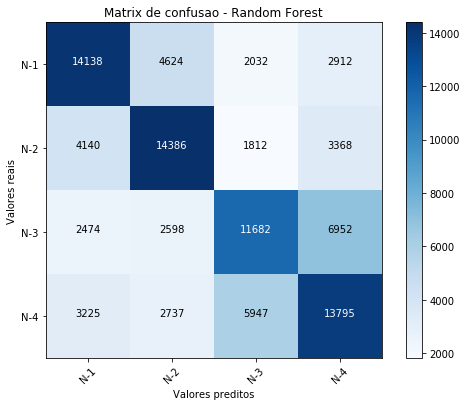

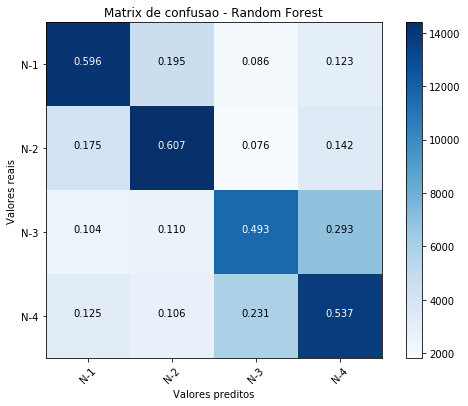

In [56]:
# encoding=utf8  
#import sys  
#reload(sys)  
#sys.setdefaultencoding('utf8')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

class_names = np.array(['N-1', 'N-2', 'N-3', 'N-4'])

yvalid = y_validate 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion de matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrix de confusão normalizada")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, ('%.3f' % cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    else:
        print('Matrix de confusão, sem normalização')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    print(cm)

    plt.tight_layout()
    plt.ylabel('Valores reais')
    plt.xlabel('Valores preditos')

# Compute confusion matrix
cnf_matrix = confusion_matrix(yvalid, rfc_y_pred_v)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix de confusao - Random Forest')
fig.set_size_inches(w=7,h=6)

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix de confusao - Random Forest')
fig_name = 'CF_figs/cm_RF.png'
fig.set_size_inches(w=7,h=6)
fig.savefig(fig_name)

plt.show()

---

## Support Vector Machine RBF

In [56]:
from sklearn import svm, datasets

print 'Processing time SVM'
%time svm_rbf = svm.SVC(kernel='rbf', gamma=0.2, C=6, decision_function_shape='ovr').fit(X_train_std, y_train)

print ''
print 'Predict time'  
%time rbf_y_pred = svm_rbf.predict(X_test_std)
from sklearn.metrics import accuracy_score

print ('SVM-RBF accuracy:---------->%.2f %%' % (accuracy_score(y_test, rbf_y_pred)*100))

Processing time SVM
Wall time: 20min 43s

Predict time
Wall time: 3min 6s
SVM-RBF accuracy:---------->64.40 %


In [84]:
accuracy_score(y_test, rbf_y_pred)

0.64399464205983037

In [85]:
print 'Predict time'  
%time rbf_y_pred_v = svm_rbf.predict(X_validate_std)
from sklearn.metrics import accuracy_score
print ('SVM-RBF accuracy:---------->%.2f %%' % (accuracy_score(y_validate, rbf_y_pred_v)*100))

Predict time
CPU times: user 3min 54s, sys: 44 ms, total: 3min 54s
Wall time: 3min 54s
SVM-RBF accuracy:---------->47.84 %


In [86]:
(accuracy_score(y_validate, rbf_y_pred_v))

0.47839334035653053

In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, rbf_y_pred_v)
confusion_matrix = confusion_matrix.astype('float')
confusion_matrix
cm = confusion_matrix
cm

array([[ 16563.,   2900.,   2134.,   2109.],
       [  9704.,   9628.,   1527.,   2847.],
       [  6035.,   3484.,   9397.,   4790.],
       [  6752.,   3199.,   5022.,  10731.]])

# Confusion Matrix

In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, rbf_y_pred_v)
confusion_matrix = confusion_matrix.astype('float')

In [89]:
confusion_matrix

array([[ 16563.,   2900.,   2134.,   2109.],
       [  9704.,   9628.,   1527.,   2847.],
       [  6035.,   3484.,   9397.,   4790.],
       [  6752.,   3199.,   5022.,  10731.]])

In [90]:
FN = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FP = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [91]:
TPR*100 # Sensitivity

array([ 42.41050853,  50.1171204 ,  51.97455752,  52.40513747])

In [92]:
TNR*100 # Specificity

array([ 87.63502285,  81.8608187 ,  81.82799522,  80.38771367])

In [93]:
PPV*100 # Precision

array([ 69.86838775,  40.6141905 ,  39.63975365,  41.74836601])

In [94]:
ACC*100 # Accuracy

array([ 69.3933197 ,  75.56237219,  76.25333085,  74.46964533])

In [95]:
sum(ACC)/6*100

49.279778011884353

In [96]:
print ('Sensitivity %.2f%%' %(sum(TPR)/4*100))
print ('Specificity %.2f%%' %(sum(TNR)/4*100))
print ('Precision %.2f%%' %(sum(PPV)/4*100))
print ('Accuray %.2f%%' %(sum(ACC)/4*100))

#print ('Sensitivity %.2f%%' %(sum(TPR)/2*100))
#print ('Specificity %.2f%%' %(sum(TNR)/2*100))
#print ('Precision %.2f%%' %(sum(PPV)/2*100))
#print ('Accuray %.2f%%' %(sum(ACC)/2*100))

Sensitivity 49.23%
Specificity 82.93%
Precision 47.97%
Accuray 73.92%


<IPython.core.display.Javascript object>


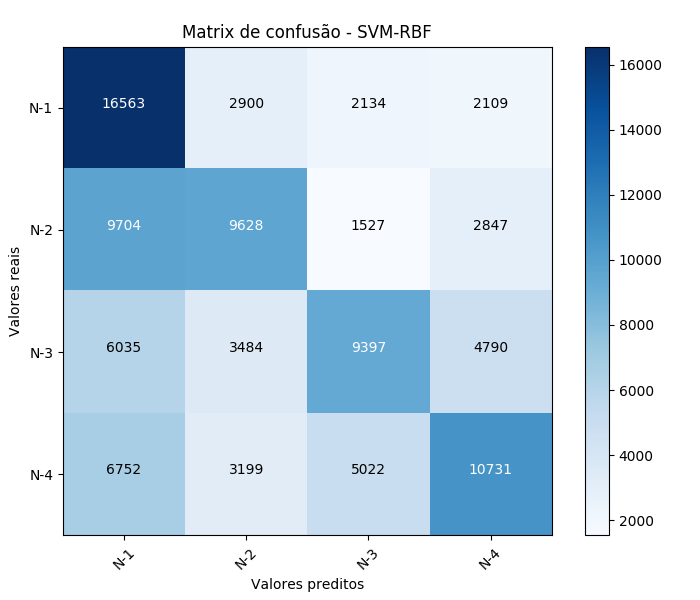

<IPython.core.display.Javascript object>


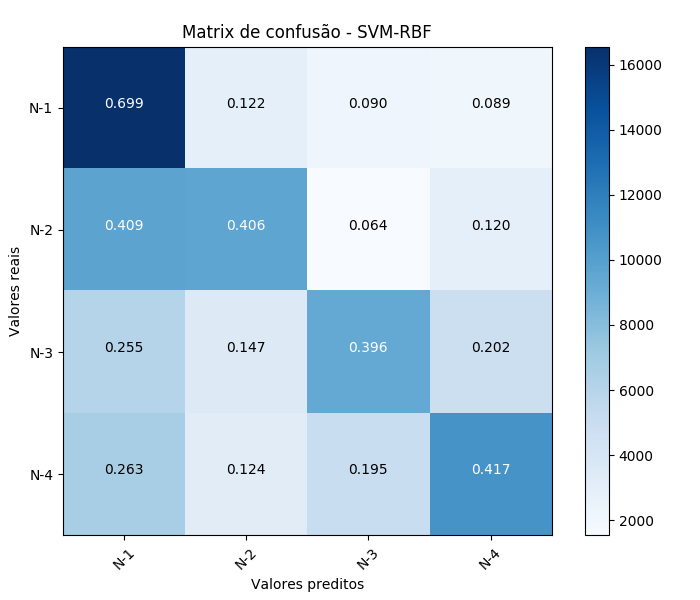

In [98]:
# encoding=utf8  
#import sys  
#reload(sys)  
#sys.setdefaultencoding('utf8')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

#%matplotlib notebook
class_names = np.array(['N-1', 'N-2', 'N-3', 'N-4'])

yvalid = y_validate 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion de matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrix de confusão normalizada")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, ('%.3f' % cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    else:
        print('Matrix de confusão, sem normalização')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    print(cm)

    plt.tight_layout()
    plt.ylabel('Valores reais')
    plt.xlabel('Valores preditos')

# Compute confusion matrix
cnf_matrix = confusion_matrix(yvalid, rbf_y_pred_v)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix de confusao - SVM-RBF')
fig.set_size_inches(w=7,h=6)

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix de confusao - SVM-RBF')
fig_name = 'CF_figs/cm_SVM-RBF.png'
fig.set_size_inches(w=7,h=6)
fig.savefig(fig_name)

plt.show()

## Support Vector Machine Poly

In [ ]:
from sklearn import svm, datasets

print 'Processing time Polynomial'
#%time svm = svm.SVC(kernel='poly', degree=2, coef0=4.7, C=48.9, decision_function_shape='ovr').fit(X_train_std, y_train)
%time svm_poly = svm.SVC(kernel='poly', degree=2,  C=500).fit(X_train_std, y_train)


Processing time Polynomial


In [ ]:
#poly_y_pred = svm_poly.predict(X_test_std)

print 'Predict time'  
%time poly_y_pred = svm_poly.predict(X_test_std)
from sklearn.metrics import accuracy_score
print ('SVM-Polynomial accuracy:--->%.2f %%' % (accuracy_score(y_test, poly_y_pred)*100))
        

In [ ]:
print 'Predict time'  
%time poly_y_pred_v = svm_poly.predict(X_validate_std)
from sklearn.metrics import accuracy_score
print ('SVM-Polynomial accuracy:---------->%.2f %%' % (accuracy_score(y_validate, poly_y_pred_v)*100))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, poly_y_pred_v)
confusion_matrix = confusion_matrix.astype('float')
confusion_matrix
cm = confusion_matrix
cm

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, poly_y_pred_v)
confusion_matrix = confusion_matrix.astype('float')

In [ ]:
confusion_matrix

In [ ]:
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
TPR*100 # Sensitivity

In [ ]:
TNR*100 # Specificity

In [ ]:
PPV*100 # Precision

In [ ]:
ACC*100 # Accuracy

In [ ]:
sum(ACC)/6*100

In [ ]:
# encoding=utf8  
#import sys  
#reload(sys)  
#sys.setdefaultencoding('utf8')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

#%matplotlib notebook
class_names = np.array(['N-0', 'N-1', 'N-2', 'N-3', 'N-4', 'N-1,5'])

yvalid = y_validate 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion de matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrix de confusão normalizada")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, ('%.3f' % cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    else:
        print('Matrix de confusão, sem normalização')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    print(cm)

    plt.tight_layout()
    plt.ylabel('Valores reais')
    plt.xlabel('Valores preditos')

# Compute confusion matrix
cnf_matrix = confusion_matrix(yvalid, poly_y_pred_v)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix de confusao - SVM-Poly')
fig.set_size_inches(w=7,h=6)

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix de confusao - SVM-Poly')
fig_name = 'CF_figs/cm_SVM-Poly.png'
fig.set_size_inches(w=7,h=6)
fig.savefig(fig_name)

plt.show()

---

## KNeigbors

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=2, weights = 'distance', algorithm = 'auto', p = 1)
knc = knc.fit(X_train_std, y_train)
print''

print 'Predict time'
%time pred = knc.predict(X_test_std)

print''

from sklearn.metrics import accuracy_score



print ('ClassifyKN accuracy:---------->%.2f %%' % (accuracy_score(y_test, pred)*100))

In [81]:
accuracy_score(y_test, pred)*100

70.42095014099111

In [82]:
%time pred = knc.predict(X_validate_std)
accuracy_score(y_validate, pred)*100

40.215143949442144

## Confusion Matrix

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, y_pred)
confusion_matrix = confusion_matrix.astype('float')

In [84]:
confusion_matrix

array([[  2.73e+04,   4.75e+03,   2.00e+01,   3.09e+03,   1.06e+03,
          3.72e+03],
       [  1.06e+04,   1.60e+03,   6.00e+00,   3.57e+03,   2.53e+03,
          5.70e+03],
       [  3.58e+04,   5.48e+03,   2.60e+01,   4.52e+03,   3.18e+03,
          4.96e+03],
       [  1.57e+04,   2.55e+03,   1.10e+01,   6.00e+03,   2.24e+03,
          3.45e+03],
       [  4.22e+04,   6.18e+03,   2.60e+01,   1.75e+04,   8.46e+03,
          2.16e+04],
       [  2.57e+04,   2.89e+03,   1.10e+01,   1.80e+04,   4.18e+03,
          1.31e+04]])

In [85]:
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [86]:
TPR*100 # Sensitivity

array([  6.83e+01,   6.68e+00,   4.82e-02,   2.00e+01,   8.81e+00,
         2.05e+01])

In [87]:
TNR*100 # Specificity

array([ 51.45,  92.3 ,  99.97,  83.21,  93.76,  83.83])

In [88]:
PPV*100 # Precision

array([ 17.34,   6.82,  26.  ,  11.41,  39.04,  24.97])

In [89]:
ACC*100 # Accuracy

array([ 53.64,  85.63,  82.45,  77.06,  67.26,  70.68])

In [90]:
sum(ACC)/6*100

72.784951410019673

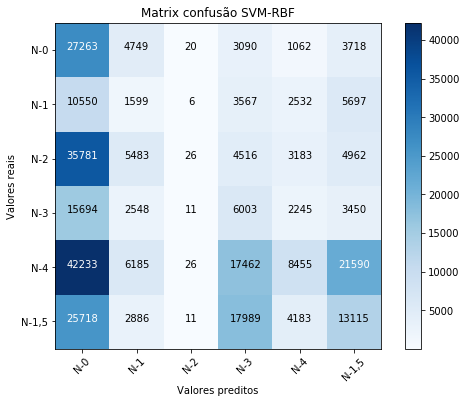

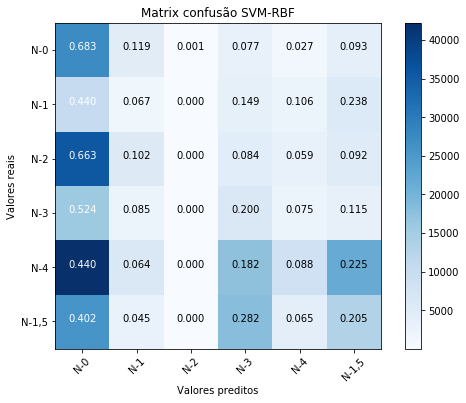

In [91]:
# encoding=utf8  
#import sys  
#reload(sys)  
#sys.setdefaultencoding('utf8')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

#%matplotlib notebook
class_names = np.array(['N-0', 'N-1', 'N-2', 'N-3', 'N-4', 'N-1,5'])

yvalid = y_validate 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrix confusão normalizada")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, ('%.3f' % cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    else:
        print('Matrix confusão, sem normalização')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    print(cm)

    plt.tight_layout()
    plt.ylabel('Valores reais')
    plt.xlabel('Valores preditos')

# Compute confusion matrix
cnf_matrix = confusion_matrix(yvalid, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix confusao SVM-RBF')
fig.set_size_inches(w=7,h=6)

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix confusao SVM-RBF')
fig_name = 'cm_SVM-RBF.png'
fig.set_size_inches(w=7,h=6)
fig.savefig(fig_name)

plt.show()